Topic: Challenge Set **5** <br> Subject: Linear Regression and Train/Test Split <br> Date: 10/02/2017 <br> Name: Kenny Leung <br> Worked with: -- <br>Location: sf17_ds8/student_submissions/challenges/05-linear_splitting/leung_kenny/challenge_set_5_kenny.ipynb

In [1]:
import sys
print("Python Version:", sys.version)

Python Version: 3.6.1 |Anaconda custom (x86_64)| (default, May 11 2017, 13:04:09) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]


In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.preprocessing import StandardScaler

In [3]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
style.use('fivethirtyeight')

In [4]:
## Load in the Ames Housing Data
datafile = "Ames_Housing_Data.tsv"
df=pd.read_csv(datafile, sep='\t')

### Challenge 1

In [5]:
df['Ones'] = np.array(1)

In [6]:
X = df.loc[:,'Ones']
y = df.loc[:,'SalePrice']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [8]:
lr_model1 = LinearRegression()
lr_model1.fit(X_train.values.reshape(-1,1),y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
pred1 = lr_model1.predict(X_test.values.reshape(-1,1))

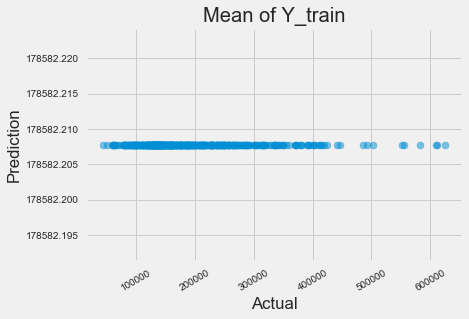

In [24]:
# plot of predictions against actual outcome
fig, ax = plt.subplots()
plt.scatter(y_test,pred1,alpha=0.5)
plt.title('Mean of Y_train')
plt.xlabel('Actual')
plt.ylabel('Prediction')
ax.ticklabel_format(useOffset=False)
plt.xticks(rotation=30);

In [12]:
y_train.mean()

178582.20776450512

In [13]:
resid1 = pred1 - y_test

(array([-500000., -400000., -300000., -200000., -100000.,       0.,
         100000.,  200000.]), <a list of 8 Text xticklabel objects>)

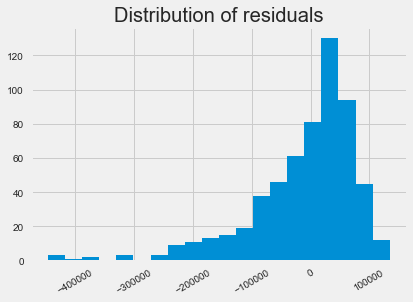

In [14]:
plt.hist(resid1,bins=20)
plt.title('Distribution of residuals')
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=30)

The model built by using only a constant term to predict the sale price of the housing data will result in the model predicting the mean of the dependent variable, in this case, the sale price. The residuals are roughly normally distributed if the outliers (really expensive houses) were taken out.

### Challenge 2

In [34]:
X = df.loc[:,['Ones','Lot Area']]
y = df.loc[:,'SalePrice']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [36]:
lr_model2 = LinearRegression()
lr_model2.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
pred2 = lr_model2.predict(X_test)

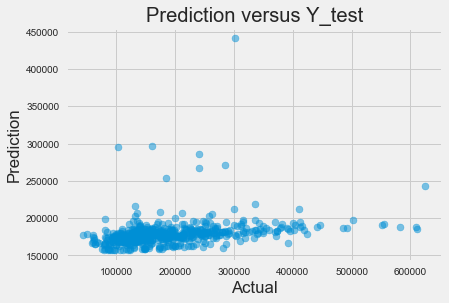

In [38]:
# plot of predictions against actual outcome
fig, ax = plt.subplots()
plt.scatter(y_test,pred2,alpha=0.5)
plt.title('Prediction versus Y_test')
plt.ylabel('Prediction')
plt.xlabel('Actual')

ax.ticklabel_format(useOffset=False)

In [39]:
print('LinReg MAD: ',np.mean(np.abs(pred2 - y_test)))
print('LinReg RMSE: ',np.sqrt(mean_squared_error(y_test, pred2)))
print('LinReg MSE: ', mean_absolute_error(y_test,pred2))
print('LinReg r2: ',r2_score(y_test, pred2))

LinReg MAD:  62056.860001011664
LinReg RMSE:  86655.581443
LinReg MSE:  62056.860001
LinReg r2:  0.0634056871335


In [40]:
resid2 = pred2 - y_test

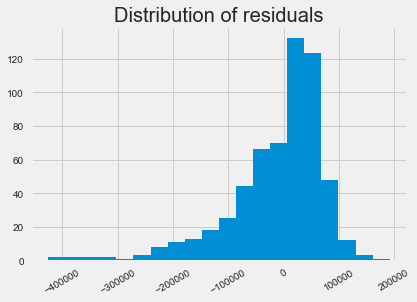

In [41]:
plt.hist(resid2,bins=20)
plt.title('Distribution of residuals')
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=30);

The correlation between lot size and sale price is clearly linear, however, there are several outliers that is causing the model to underpredict the price. The predicted price for this outlier is 450,000 but the actual sale price was 300,000 which perhaps indicates that the house was sold much under its actual value.

### Challenge 3

In [42]:
df['Lot Shape'].unique()

array(['IR1', 'Reg', 'IR2', 'IR3'], dtype=object)

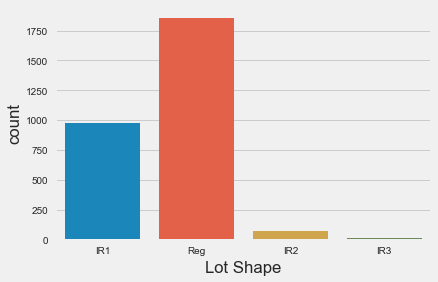

In [58]:
sns.countplot(df['Lot Shape'])

In [43]:
dummies = pd.get_dummies(df['Lot Shape'])

In [44]:
df = pd.concat([df, dummies], axis=1)

In [45]:
df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [46]:
X = df.loc[:,['Ones','Lot Area','IR1','IR2','IR3','Reg']]
y = df.loc[:,'SalePrice']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [48]:
lr_model3 = LinearRegression()
lr_model3.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [49]:
pred3 = lr_model3.predict(X_test)

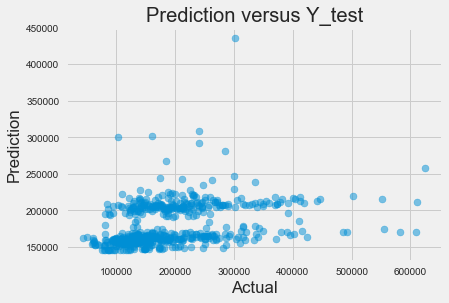

In [52]:
# plot of predictions against actual outcome
fig, ax = plt.subplots()
plt.scatter(y_test,pred3,alpha=0.5)
plt.title('Prediction versus Y_test')
plt.ylabel('Prediction')
plt.xlabel('Actual')

ax.ticklabel_format(useOffset=False)

In [51]:
print('LinReg MAD: ',np.mean(np.abs(pred3 - y_test)))
print('LinReg RMSE: ',np.sqrt(mean_squared_error(y_test, pred3)))
print('LinReg MSE: ', mean_absolute_error(y_test,pred3))
print('LinReg r2: ',r2_score(y_test, pred3))

LinReg MAD:  58540.9802551309
LinReg RMSE:  84652.4039006
LinReg MSE:  58540.9802551
LinReg r2:  0.106206841804


The model shows two distinct groups, IR1 and Reg lots as shown in the countplot above. This plot shows that the lot size has a signal on the actual sale price of the house.

### Challenge 4 & 5

In [59]:
df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [60]:
df['OQ2'] = df['Overall Qual']**2

In [115]:
df['OQ4'] = df['OQ2']**2

In [99]:
df['LogYear'] = np.log(df['Year Built'])

In [116]:
X = df.loc[:,['IR1','IR2','IR3','Reg','Lot Area','Gr Liv Area','OQ4','LogYear']]
y = df.loc[:,'SalePrice']

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)

In [125]:
# standardize data
std = StandardScaler()
std.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [126]:
X_tr = std.transform(X_train)
X_te = std.transform(X_test)

In [127]:
lr_model4 = LinearRegression()
lr_model4.fit(X_tr,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [128]:
pred4 = lr_model4.predict(X_te)

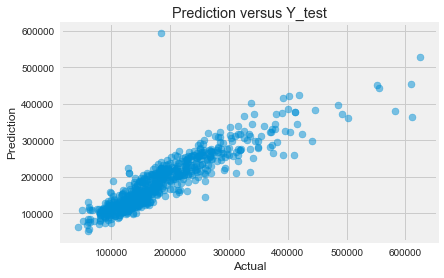

In [129]:
# plot of predictions against actual outcome
fig, ax = plt.subplots()
plt.scatter(y_test,pred4,alpha=0.5)
plt.title('Prediction versus Y_test')
plt.ylabel('Prediction')
plt.xlabel('Actual')

ax.ticklabel_format(useOffset=False)

In [130]:
print('LinReg MAD: ',np.mean(np.abs(pred4 - y_test)))
print('LinReg RMSE: ',np.sqrt(mean_squared_error(y_test, pred4)))
print('LinReg MSE: ', mean_absolute_error(y_test,pred4))
print('LinReg r2: ',r2_score(y_test, pred4))

LinReg MAD:  23639.61559987633
LinReg RMSE:  36864.1978366
LinReg MSE:  23639.6155999
LinReg r2:  0.813586387299


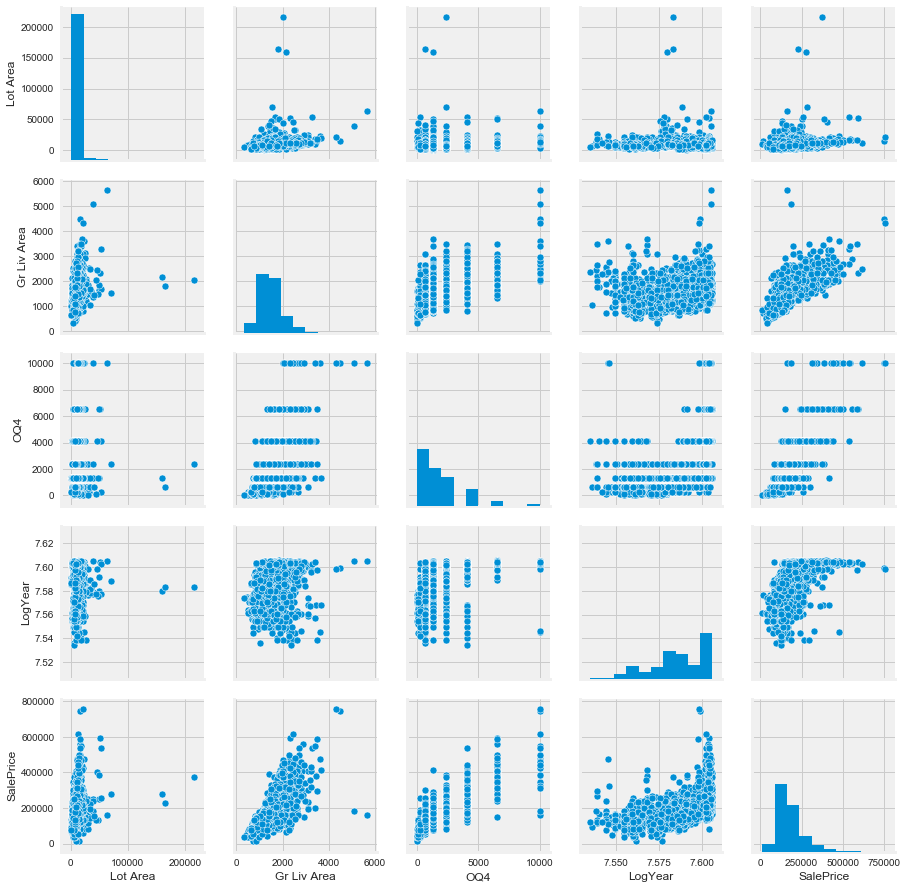

In [131]:
sns.pairplot(pd.concat([X_train.iloc[:,4:10], y_train], axis=1))